L'objectif de ce notebook est d'appliquer des modèles supervisé pour prédire la classe `CODE_GROUP` de la culture des parcelles (mais, ou blé).
Les modèles utilisés : 

- XGBoost
- LSTM (Long Short Term Memory)

In [1]:
# Attention : prend 2 minutes
!gdown https://drive.google.com/uc?id=1emmjcpCKDOWQoS2ZL6ZLcSIxNgUBQmOh -O USE_CASE_1.zip

Downloading...
From: https://drive.google.com/uc?id=1emmjcpCKDOWQoS2ZL6ZLcSIxNgUBQmOh
To: /content/USE_CASE_1.zip
100% 3.30G/3.30G [00:57<00:00, 57.7MB/s]


In [4]:
#!unzip USE_CASE_1.zip

# Supervised Learning

1- XGBoost algorithm

2- LSTM algorithm

## XGBoost algorithm

In [ ]:
# ! pip3 install xgboost==1.4.1

In [7]:
#! pip install geopandas

In [8]:
import numpy as np
import geopandas as gpd # pour des donnees vecteurs geo
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Récupérer les données géoréférencées

In [10]:
# Load geodataframe
gdf_file = './USE_CASE_1/reconstructed_stats/reconstructed_stats/T31TCJ_median_ndvi.shp'
gdf = gpd.read_file(gdf_file)
dates = gdf.columns[8:-1]

# Une line de X est la réponse ndvi d'une parcelle par rapport aux dates 
X = gdf[dates].values
y = (gdf['CODE_GROUP'].values).astype(int)
y = y-1

In [13]:
gdf.head()

,fid,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,area,20181112,20181117,20181127,20190111,20190116,20190215,20190220,20190225,20190322,20190327,20190501,20190531,20190705,20190710,20190715,20190725,20190804,20190809,20190814,20190824,20190913,20191008,20191013,geometry
0,7918132.0,8583490,2.71,MIS,2,None,None,27085.062805,0.225880,0.402877,0.651829,0.669520,0.633834,0.140981,0.154341,0.138403,0.139207,0.131674,0.136735,0.198747,0.645234,0.784399,0.727054,0.578611,0.594734,0.608153,0.644175,0.606064,0.327259,0.211341,0.199078,"POLYGON ((346100.728 4856718.116, 346101.164 4..."
1,7109780.0,14712598,2.60,MIS,2,None,None,25972.267365,0.305204,0.325589,0.366240,0.412587,0.282082,0.135613,0.131725,0.128513,0.132203,0.119140,0.118509,0.176152,0.873054,0.917857,0.915328,0.886364,0.891055,0.890878,0.907466,0.889100,0.865731,0.606084,0.436044,"POLYGON ((388836.372 4848383.454, 388836.586 4..."
2,7021173.0,12205360,5.57,MIS,2,None,None,55591.881784,0.223748,0.237835,0.322333,0.289941,0.303216,0.267771,0.258595,0.234161,0.145205,0.128049,0.112323,0.187414,0.706473,0.831043,0.855697,0.839615,0.849599,0.887320,0.894450,0.876023,0.822231,0.509181,0.423261,"POLYGON ((317915.388 4796580.085, 317910.352 4..."
3,7891909.0,16205895,5.00,MIS,2,None,None,49999.741512,0.165396,0.192027,0.201810,0.279955,0.290970,0.308655,0.155310,0.145823,0.124328,0.120332,0.147760,0.224771,0.849654,0.896828,0.902086,0.873365,0.857395,0.871039,0.880243,0.846292,0.534748,0.203958,0.197751,"POLYGON ((404297.751 4848228.615, 404328.793 4..."
4,695973.0,16183747,4.25,MIS,2,DFV,DVS,42492.768066,0.220622,0.248052,0.281957,0.458022,0.498054,0.477627,0.466097,0.461390,0.303446,0.266970,0.135327,0.147316,0.729151,0.770675,0.787642,0.771484,0.821389,0.828034,0.861426,0.842315,0.798481,0.450977,0.406509,"POLYGON ((393371.402 4844649.750, 393322.862 4..."


In [11]:
X.shape

(5000, 23)

In [12]:
y.shape

(5000,)

# Le modèle XGBoost

Issue de l’algorithme Gradient Boosting → combiner les résultats d’un ensemble de modèles afin de fournir une meilleur prédiction

Spécificité : méthode séquentielle → apprentissage en prenant en compte les erreurs de l'itération antérieur (à l’aide de pondération)

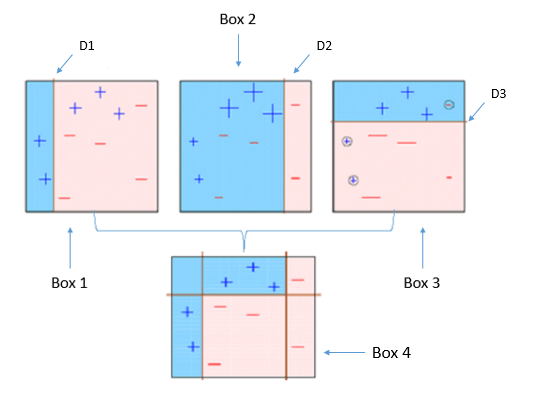

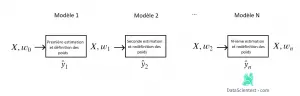

In [15]:
# divide dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# random_state in order to fix the kernel

In [16]:
# inspect the data
print ("X train shape",X_train.shape)
print ("y train shape",y_train.shape)
print ("unique labels train",np.unique(y_train,return_counts=True))
print ("X test shape",X_test.shape)
print ("y test shape",y_test.shape)
print ("unique labels test",np.unique(y_test,return_counts=True))

X train shape (3750, 23)
y train shape (3750,)
unique labels train (array([0, 1]), array([1880, 1870]))
X test shape (1250, 23)
y test shape (1250,)
unique labels test (array([0, 1]), array([620, 630]))


In [17]:
# define the classifer and the evaluation dataset
model = XGBClassifier()
evalset = [(X_train, y_train), (X_test,y_test)]

In [18]:
model

XGBClassifier()

In [19]:
evalset

[(array([[0.24027178, 0.2750288 , 0.38238168, ..., 0.12775782, 0.11419486,
          0.17726518],
         [0.28198197, 0.28508946, 0.16433121, ..., 0.32172537, 0.18289787,
          0.19736175],
         [0.22206897, 0.25865835, 0.24826546, ..., 0.57465088, 0.36475706,
          0.23135825],
         ...,
         [0.21747972, 0.20565362, 0.19380537, ..., 0.34135193, 0.22940797,
          0.19678012],
         [0.15607986, 0.19283849, 0.40737951, ..., 0.1409101 , 0.14785373,
          0.16505277],
         [0.20671061, 0.24017467, 0.23412654, ..., 0.69297165, 0.34135339,
          0.31392744]]), array([0, 1, 1, ..., 1, 0, 1])),
 (array([[0.27448714, 0.25495562, 0.28794783, ..., 0.14746419, 0.11287615,
          0.12910998],
         [0.14462394, 0.17899176, 0.35992217, ..., 0.15777217, 0.11208791,
          0.10982659],
         [0.12268115, 0.11258205, 0.12074643, ..., 0.12938596, 0.09917355,
          0.11056893],
         ...,
         [0.12310674, 0.17744793, 0.30071713, ..., 0.20

In [20]:
# fit the XGBoost model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# l'erreur sur les données d'apprentissage dans la colonne de gauche
# l'erreur sur les données de test dans la colonne de droite

[0]	validation_0-logloss:0.59913	validation_1-logloss:0.60027
[1]	validation_0-logloss:0.522134	validation_1-logloss:0.524205
[2]	validation_0-logloss:0.457941	validation_1-logloss:0.460888
[3]	validation_0-logloss:0.403628	validation_1-logloss:0.407513
[4]	validation_0-logloss:0.357214	validation_1-logloss:0.36192
[5]	validation_0-logloss:0.31727	validation_1-logloss:0.32278
[6]	validation_0-logloss:0.282572	validation_1-logloss:0.28886
[7]	validation_0-logloss:0.252349	validation_1-logloss:0.259343
[8]	validation_0-logloss:0.225749	validation_1-logloss:0.233541
[9]	validation_0-logloss:0.202319	validation_1-logloss:0.210259
[10]	validation_0-logloss:0.181658	validation_1-logloss:0.190298
[11]	validation_0-logloss:0.163338	validation_1-logloss:0.172047
[12]	validation_0-logloss:0.147083	validation_1-logloss:0.156253
[13]	validation_0-logloss:0.132615	validation_1-logloss:0.141918
[14]	validation_0-logloss:0.119701	validation_1-logloss:0.12972
[15]	validation_0-logloss:0.108179	validat

XGBClassifier()

In [21]:
# evaluate model performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)

print('Accuracy: %.8f' % score)
print(yhat, '\n',
      np.unique(yhat, return_counts=True), '\n',
      np.unique(y_test, return_counts=True))

Accuracy: 0.99360000
[0 0 0 ... 0 0 0] 
 (array([0, 1]), array([620, 630])) 
 (array([0, 1]), array([620, 630]))


In [22]:
proba = model.predict_proba(X_test) # pour calculer la proba d'appartenance à chaque classe
proba

array([[9.9928957e-01, 7.1043201e-04],
       [9.9922353e-01, 7.7645096e-04],
       [9.9968624e-01, 3.1373187e-04],
       ...,
       [9.9572754e-01, 4.2724395e-03],
       [9.9891758e-01, 1.0824271e-03],
       [9.9973065e-01, 2.6934303e-04]], dtype=float32)

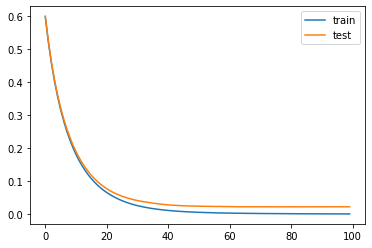

In [23]:
# get model performance and plot the loss curves
results = model.evals_result()

#using matplotlib
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

# l'erreur est plus eleves sur les données de test que sur les données de train

## Parameter tuning

**Conclusion sur le 1er modèle :**
Ce cas d'utilisation ne nécessite pas beaucoup d'ajustement des paramètres car il a déjà donné de bons résultats. 

**Pour la suite :**
Cependant, dans des problèmes de classification plus difficiles, l'ajustement des paramètres peut améliorer les résultats. 

Voici les étapes pratiques pour affiner les paramètres de l'algorithme XGBoost en utilisant les courbes d'apprentissage. 

**Remarque :**
Les courbes d'apprentissage permettent de comprendre l'effet de chaque paramètre sur les performances du modèle. Des méthodes plus automatisées existent, comme la recherche sur grille (`grid search`). Cependant, nous allons ici nous concentrer sur les courbes d'apprentissage pour mieux comprendre le modèle XGBoost.

**1. Increase the number of iterations (estimators)**

[0]	validation_0-logloss:0.59913	validation_1-logloss:0.60027
[1]	validation_0-logloss:0.522134	validation_1-logloss:0.524205
[2]	validation_0-logloss:0.457941	validation_1-logloss:0.460888
[3]	validation_0-logloss:0.403628	validation_1-logloss:0.407513
[4]	validation_0-logloss:0.357214	validation_1-logloss:0.36192
[5]	validation_0-logloss:0.31727	validation_1-logloss:0.32278
[6]	validation_0-logloss:0.282572	validation_1-logloss:0.28886
[7]	validation_0-logloss:0.252349	validation_1-logloss:0.259343
[8]	validation_0-logloss:0.225749	validation_1-logloss:0.233541
[9]	validation_0-logloss:0.202319	validation_1-logloss:0.210259
[10]	validation_0-logloss:0.181658	validation_1-logloss:0.190298
[11]	validation_0-logloss:0.163338	validation_1-logloss:0.172047
[12]	validation_0-logloss:0.147083	validation_1-logloss:0.156253
[13]	validation_0-logloss:0.132615	validation_1-logloss:0.141918
[14]	validation_0-logloss:0.119701	validation_1-logloss:0.12972
[15]	validation_0-logloss:0.108179	validat

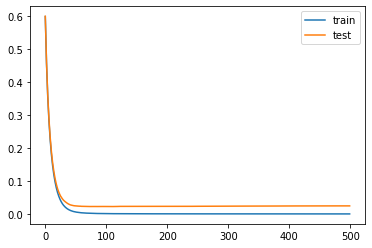

In [24]:
# On augmente le nombre de modèles utilisés : n_estimators (qui est par défaut à 100)

model = XGBClassifier(n_estimators=500)
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate model performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.8f' % score)
results = model.evals_result()

#using matplotlib
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

Les courbes descendent très vite, l'algorithme apprend très vite ça veut dire.
On va alors diminuer la vitesse d'apprentissage de l'algorithme.
Car sinon on risque de faire du sur-apprentissage.

On va utiliser le "learning_rate".
Plus ce coefficient est petit, plus le modèle va prendre son temps dans l'apprentissage.

### Long flat curves might indicate that the algorithm is learning too fast. We can slow it down by decreasing the learning rate. The learning rate limits the contribution of each tree to the ensemble

**2. Decreasing the learning rate**

[0]	validation_0-logloss:0.59913	validation_1-logloss:0.60027
[1]	validation_0-logloss:0.522134	validation_1-logloss:0.524205
[2]	validation_0-logloss:0.457941	validation_1-logloss:0.460888
[3]	validation_0-logloss:0.403628	validation_1-logloss:0.407513
[4]	validation_0-logloss:0.357214	validation_1-logloss:0.36192
[5]	validation_0-logloss:0.31727	validation_1-logloss:0.32278
[6]	validation_0-logloss:0.282572	validation_1-logloss:0.28886
[7]	validation_0-logloss:0.252349	validation_1-logloss:0.259343
[8]	validation_0-logloss:0.225749	validation_1-logloss:0.233541
[9]	validation_0-logloss:0.202319	validation_1-logloss:0.210259
[10]	validation_0-logloss:0.181658	validation_1-logloss:0.190298
[11]	validation_0-logloss:0.163338	validation_1-logloss:0.172047
[12]	validation_0-logloss:0.147083	validation_1-logloss:0.156253
[13]	validation_0-logloss:0.132615	validation_1-logloss:0.141918
[14]	validation_0-logloss:0.119701	validation_1-logloss:0.12972
[15]	validation_0-logloss:0.108179	validat

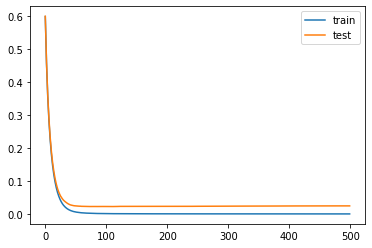

In [25]:
model = XGBClassifier(n_estimators=500, eta=0.05)
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate model performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.8f' % score)
results = model.evals_result()

#using matplotlib
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

Quand on fait du parametrage manuellement, une méthode est de suivre les étapes suivantes :
1. ajuster le nombre de modèles
2. ajuster le learning rate
3. réajuster à nouveau le nombre d'estimateurs (ie. de modèles)

### We can see that the performance is still the same while increasing the iterations and decreasing the learning rate. Let's try increasing the number of iterations to 2000

[0]	validation_0-logloss:0.59913	validation_1-logloss:0.60027
[1]	validation_0-logloss:0.522134	validation_1-logloss:0.524205
[2]	validation_0-logloss:0.457941	validation_1-logloss:0.460888
[3]	validation_0-logloss:0.403628	validation_1-logloss:0.407513
[4]	validation_0-logloss:0.357214	validation_1-logloss:0.36192
[5]	validation_0-logloss:0.31727	validation_1-logloss:0.32278
[6]	validation_0-logloss:0.282572	validation_1-logloss:0.28886
[7]	validation_0-logloss:0.252349	validation_1-logloss:0.259343
[8]	validation_0-logloss:0.225749	validation_1-logloss:0.233541
[9]	validation_0-logloss:0.202319	validation_1-logloss:0.210259
[10]	validation_0-logloss:0.181658	validation_1-logloss:0.190298
[11]	validation_0-logloss:0.163338	validation_1-logloss:0.172047
[12]	validation_0-logloss:0.147083	validation_1-logloss:0.156253
[13]	validation_0-logloss:0.132615	validation_1-logloss:0.141918
[14]	validation_0-logloss:0.119701	validation_1-logloss:0.12972
[15]	validation_0-logloss:0.108179	validat

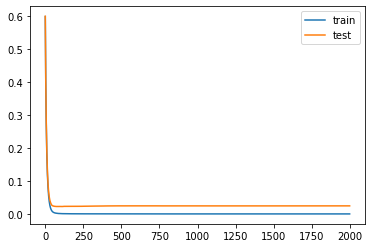

In [26]:
model = XGBClassifier(n_estimators=2000,eta=0.05)
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate model performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.8f' % score)
results = model.evals_result()

#using matplotlib
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

Pour généraliser les modèles, et ajouter plus de robustesse, les derniers parametres que nous allons ajuster sont :

- subsample : choix d'un pourcentage des données de l'ensemble d'entraînement qui seront sélectionnées à chaque itération (on va sélectionner uniquement 50% des données d'entraînement par exemple) --> sous-échantillonnage à chaque itération du boosting

- colsample_bytree : on va choisir aléatoirement un nb de features (choix d'un pourcentage de variables, de colonnes, qui seront sélectionnés à chaque itération) --> sous-échantillonnage des colonnes lors de la construction de chaque arbre de décision.

### We arrived to similar results as with the initial configuration. Increasing the number of iterations and decreasing the learning rate is a good start to optimize the parameters of the XGBoost. This process can be performed multiple times

**3. Reguralization using the number of samples and feature used to construct the trees**

[0]	validation_0-logloss:0.599955	validation_1-logloss:0.601042
[1]	validation_0-logloss:0.523375	validation_1-logloss:0.525004
[2]	validation_0-logloss:0.459324	validation_1-logloss:0.46168
[3]	validation_0-logloss:0.405115	validation_1-logloss:0.408006
[4]	validation_0-logloss:0.358858	validation_1-logloss:0.362239
[5]	validation_0-logloss:0.319133	validation_1-logloss:0.323056
[6]	validation_0-logloss:0.284348	validation_1-logloss:0.288982
[7]	validation_0-logloss:0.253928	validation_1-logloss:0.258281
[8]	validation_0-logloss:0.227446	validation_1-logloss:0.232281
[9]	validation_0-logloss:0.204053	validation_1-logloss:0.209248
[10]	validation_0-logloss:0.183494	validation_1-logloss:0.188918
[11]	validation_0-logloss:0.165264	validation_1-logloss:0.170601
[12]	validation_0-logloss:0.149033	validation_1-logloss:0.154355
[13]	validation_0-logloss:0.134387	validation_1-logloss:0.140112
[14]	validation_0-logloss:0.121579	validation_1-logloss:0.127459
[15]	validation_0-logloss:0.110023	v

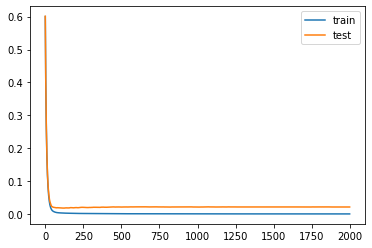

In [27]:
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate model performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.8f' % score)
results = model.evals_result()

#using matplotlib
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

On a amélioré le `logloss`.

### Now that we are happy with the results, let's calculate all the evaluation metrics we learned before

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test,yhat)
f_score = f1_score(y_test,yhat)
p_score = precision_score(y_test,yhat)
r_score = recall_score(y_test,yhat)
confusion_mat = confusion_matrix(y_test,yhat)

print ('accuracy',accuracy)
print ('f1 score',f_score)
print ('precision',p_score)
print ('recall',r_score)
print ('confusion matrix',confusion_mat)

accuracy 0.9944
f1 score 0.9944311853619731
precision 0.9968102073365231
recall 0.9920634920634921
confusion matrix [[618   2]
 [  5 625]]


In [29]:
# or we can get a classification repot using sklearn
from sklearn.metrics import classification_report
report = classification_report(y_test,yhat)
report

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       620\n           1       1.00      0.99      0.99       630\n\n    accuracy                           0.99      1250\n   macro avg       0.99      0.99      0.99      1250\nweighted avg       0.99      0.99      0.99      1250\n'

### The XGBoost algorithm allows us to visualize the feature importance, i.e., a score associated with each input feature that reflects its importance in making the decision function

Importance de features. IA explicable (on va essayer de comprendre avec le feature qu'on prend comment le modèle a pensé).

<BarContainer object of 23 artists>

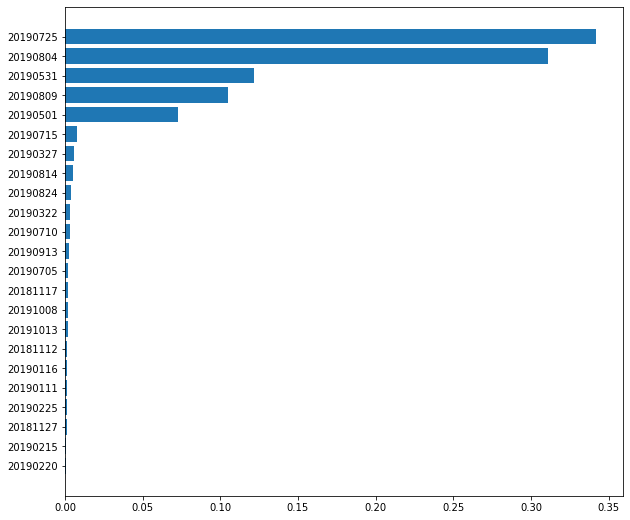

In [30]:
importance = model.feature_importances_
sorted_idx = importance.argsort()
plt.figure(figsize=(10,9))
plt.barh(dates[sorted_idx], importance[sorted_idx])

## Discussion en fonction des dates et de leur importance dans la détermination des sols (blé ou maïs)

## Commentaires
## Ici représentation de l'importance en magnitude (comment le feature a influencé)
# on ne sait pas positivement ou negativement
# ni pour quel classe

# Long Short Term Memory algorithm (LSTM)

### The LSTM algorithm is adapted for time series classifiaction (as in our use case). 
### It can also handle missing data without the need of reconstruction or interpolation. 

In [84]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Masking,Dropout
from keras.losses import binary_crossentropy
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('CPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [85]:
# let's get our data without interpolation 
# c'est à dire avec les données manquantes, il faut juste spécifier où sont les données manquantes)

gdf_file = './USE_CASE_1/cleaned_stats/cleaned_stats/T31TCJ_median_ndvi.shp'

gdf = gpd.read_file(gdf_file)
dates = gdf.columns[8:-1]
X = gdf[dates].values
y = (gdf['CODE_GROUP'].values).astype(int)
y = y-1
print (np.isnan(X).sum())

2956


In [86]:
X

array([[0.22587968, 0.40287685, 0.65182883, ..., 0.32725853, 0.21134055,
        0.19907834],
       [0.30520394, 0.32558912, 0.36623964, ..., 0.86573148, 0.60608363,
        0.43604442],
       [0.22374834, 0.23783511, 0.32233343, ..., 0.82223094, 0.50918078,
        0.42326084],
       ...,
       [0.10452187, 0.16273007, 0.23801066, ..., 0.12513369, 0.10567863,
        0.12014046],
       [0.11678173, 0.11885121, 0.11374897, ..., 0.30734202, 0.20668924,
        0.2042512 ],
       [0.22061597, 0.21774492, 0.26005709, ..., 0.13929008, 0.10638298,
        0.11362749]])

In [87]:
# let's first replace our nans with a value to indicate them for the algorithm
X[np.isnan(X)]=-2

# now let's see if we still have nans or not 
print (np.isnan(X).sum())

# divide our dataset into 75% train and 25% test and then inspect the shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print ("X train shape",X_train.shape)
print ("y train shape",y_train.shape)
print ("unique labels train",np.unique(y_train,return_counts=True))
print ("X test shape",X_test.shape)
print ("y test shape",y_test.shape)
print ("unique labels test",np.unique(y_test,return_counts=True))

0
X train shape (3750, 23)
y train shape (3750,)
unique labels train (array([0, 1]), array([1880, 1870]))
X test shape (1250, 23)
y test shape (1250,)
unique labels test (array([0, 1]), array([620, 630]))


In [70]:
np.unique(gdf['CODE_GROUP'])

array(['1', '2'], dtype=object)

In [71]:
np.isnan(y).sum()

0

### Note that by fixing the random state of the train_test_split, we have the same exact training and testing dataset as in the XGBoost
### except that the data here has missing values

In [88]:
x_shape = X_train.shape[1]
y_shape = 1
n_class = 2 # 2 inputs sorties
model = Sequential()
model.add(Masking(mask_value=-2, input_shape=(x_shape, y_shape)))

model.add(LSTM(100)) # il y a 100 number samples
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
# one hot encoding of the labels
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test,2)
# transform X to 3D (samples,time steps,features)
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)

print ("X train shape",X_train.shape)
print ("y train shape",y_train.shape)
print ("unique labels train",np.unique(y_train,return_counts=True))
print ("X test shape",X_test.shape)
print ("y test shape",y_test.shape)
print ("unique labels test",np.unique(y_test,return_counts=True))

X train shape (3750, 23, 1)
y train shape (3750, 2)
unique labels train (array([0., 1.], dtype=float32), array([3750, 3750]))
X test shape (1250, 23, 1)
y test shape (1250, 2)
unique labels test (array([0., 1.], dtype=float32), array([1250, 1250]))


In [90]:
print(X_train.shape, y_train.shape)

(3750, 23, 1) (3750, 2)


In [75]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [76]:
X_train

array([[[ 0.24027178],
        [ 0.2750288 ],
        [ 0.38238168],
        ...,
        [ 0.12775782],
        [ 0.11419486],
        [-2.        ]],

       [[ 0.28198197],
        [ 0.28508946],
        [ 0.16433121],
        ...,
        [ 0.32172537],
        [ 0.18289787],
        [ 0.19736175]],

       [[ 0.22206897],
        [ 0.25865835],
        [ 0.24826546],
        ...,
        [ 0.57465088],
        [ 0.36475706],
        [ 0.23135825]],

       ...,

       [[ 0.21747972],
        [ 0.20565362],
        [ 0.19380537],
        ...,
        [ 0.34135193],
        [ 0.22940797],
        [ 0.19678012]],

       [[ 0.15607986],
        [ 0.19283849],
        [ 0.40737951],
        ...,
        [ 0.1409101 ],
        [ 0.14785373],
        [ 0.16505277]],

       [[ 0.20671061],
        [ 0.24017467],
        [ 0.23412654],
        ...,
        [ 0.69297165],
        [ 0.34135339],
        [ 0.31392744]]])

In [91]:
# define a path to store the models at each iteration
filepath="./LSTM_WEIGHTS/weights-{epoch:02d}-{loss:.2f}.hdf5"
# define the model checkpoint
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1,save_best_only=False)
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train, epochs=10, shuffle = True,batch_size=32,callbacks=callbacks_list,validation_data=(X_test, y_test))

Epoch 1/10
116/118 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.8877
Epoch 00001: saving model to ./LSTM_WEIGHTS/weights-01-0.27.hdf5
118/118 [==============================] - 9s 39ms/step - loss: 0.2672 - accuracy: 0.8885 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 2/10
116/118 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9900
Epoch 00002: saving model to ./LSTM_WEIGHTS/weights-02-0.04.hdf5
118/118 [==============================] - 3s 27ms/step - loss: 0.0445 - accuracy: 0.9901 - val_loss: 0.0342 - val_accuracy: 0.9912
Epoch 3/10
116/118 [============================>.] - ETA: 0s - loss: 0.0340 - accuracy: 0.9900
Epoch 00003: saving model to ./LSTM_WEIGHTS/weights-03-0.03.hdf5
118/118 [==============================] - 3s 27ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0721 - val_accuracy: 0.9808
Epoch 4/10
118/118 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9912
Epoch 00004: saving model

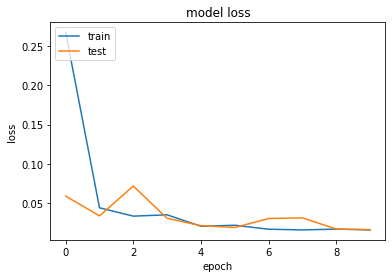

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#yhat = model.predict_classes(X_test)
yhat = model.predict(X_test).round()
y1 = y_test.astype(int) 
accuracy = accuracy_score(y_test[:,1], yhat[:,1], normalize=False)
f_score = f1_score(y_test[:,1], yhat[:,1])
p_score = precision_score(y_test[:,1], yhat[:,1])
r_score = recall_score(y_test[:,1], yhat[:,1])
confusion_mat = confusion_matrix(y_test[:,1], yhat[:,1])

print ('accuracy',accuracy)
print ('f1 score',f_score)
print ('precision',p_score)
print ('recall',r_score)
print ('confusion matrix',confusion_mat)

accuracy 1243
f1 score 0.9944488501189532
precision 0.993660855784469
recall 0.9952380952380953
confusion matrix [[616   4]
 [  3 627]]
